In [1]:
# Importing nessary modules
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Data file path
data_path = '../data/all_data.json'

In [3]:
# loading data into dataframe
df = pd.read_json(data_path)

In [4]:
# viewing first few rows
df.head()

,deviceId,channel,endTime,startTime,value,unit
0,2124549771,0,1631496600000,1631494800000,2.618,kWh
1,2124549771,0,1631494800000,1631493000000,2.748,kWh
2,2124549771,0,1631493000000,1631491200000,2.632,kWh
3,2124549771,0,1631491200000,1631489400000,2.634,kWh
4,2124549771,0,1631489400000,1631487600000,2.748,kWh


In [5]:
# viewing last few rows
df.tail()

,deviceId,channel,endTime,startTime,value,unit
3259,2124549771,0,1625542200000,1625540400000,2.944,kWh
3260,2124549771,0,1625540400000,1625538600000,2.838,kWh
3261,2124549771,0,1625538600000,1625536800000,2.850,kWh
3262,2124549771,0,1625536800000,1625535000000,2.868,kWh
3263,2124549771,0,1625535000000,1625533200000,2.728,kWh


In [6]:
# size of the data frame
df.shape

(3264, 6)

In [7]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deviceId   3264 non-null   int64  
 1   channel    3264 non-null   int64  
 2   endTime    3264 non-null   int64  
 3   startTime  3264 non-null   int64  
 4   value      3264 non-null   float64
 5   unit       3264 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 153.1+ KB


In [8]:
# df.iloc[:, 2:4] = df.iloc[:, 2:4].apply(pd.to_datetime, errors='coerce')
# convert type of time field for easy access
df["endTime"] = pd.to_datetime(df["endTime"], unit="ms")

In [9]:
df["startTime"] = pd.to_datetime(df["startTime"], unit="ms")

In [10]:
# checking the datatype and information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   deviceId   3264 non-null   int64         
 1   channel    3264 non-null   int64         
 2   endTime    3264 non-null   datetime64[ns]
 3   startTime  3264 non-null   datetime64[ns]
 4   value      3264 non-null   float64       
 5   unit       3264 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 153.1+ KB


In [11]:
df.head()

,deviceId,channel,endTime,startTime,value,unit
0,2124549771,0,2021-09-13 01:30:00,2021-09-13 01:00:00,2.618,kWh
1,2124549771,0,2021-09-13 01:00:00,2021-09-13 00:30:00,2.748,kWh
2,2124549771,0,2021-09-13 00:30:00,2021-09-13 00:00:00,2.632,kWh
3,2124549771,0,2021-09-13 00:00:00,2021-09-12 23:30:00,2.634,kWh
4,2124549771,0,2021-09-12 23:30:00,2021-09-12 23:00:00,2.748,kWh


In [12]:
df.tail()

,deviceId,channel,endTime,startTime,value,unit
3259,2124549771,0,2021-07-06 03:30:00,2021-07-06 03:00:00,2.944,kWh
3260,2124549771,0,2021-07-06 03:00:00,2021-07-06 02:30:00,2.838,kWh
3261,2124549771,0,2021-07-06 02:30:00,2021-07-06 02:00:00,2.850,kWh
3262,2124549771,0,2021-07-06 02:00:00,2021-07-06 01:30:00,2.868,kWh
3263,2124549771,0,2021-07-06 01:30:00,2021-07-06 01:00:00,2.728,kWh


In [13]:
# check how many device in the dataset
df["deviceId"].value_counts()

2124549771    3264
Name: deviceId, dtype: int64

#### the dataframe contain only one device so we can remove device id column for further processing

In [14]:
# Deleting columns
df.drop(columns=["deviceId", "unit", "channel", "startTime"], inplace=True)

In [15]:
df.head()

,endTime,value
0,2021-09-13 01:30:00,2.618
1,2021-09-13 01:00:00,2.748
2,2021-09-13 00:30:00,2.632
3,2021-09-13 00:00:00,2.634
4,2021-09-12 23:30:00,2.748


In [16]:
# change column name
df.rename(columns={"endTime": "time"}, inplace=True) 

In [17]:
df.sample()

,time,value
2075,2021-07-30 20:00:00,2.116


In [18]:
# Converting 1/2 hr data into hourly data by merging columns
df = df.groupby(pd.Grouper(key="time", axis=0, 
                      freq='H')).sum()

In [19]:
df.shape

(1657, 1)

In [20]:
df.sample()

,value
time,
2021-08-07 21:00:00,4.526


<AxesSubplot:title={'center':'AVM Bolton'}, xlabel='time'>

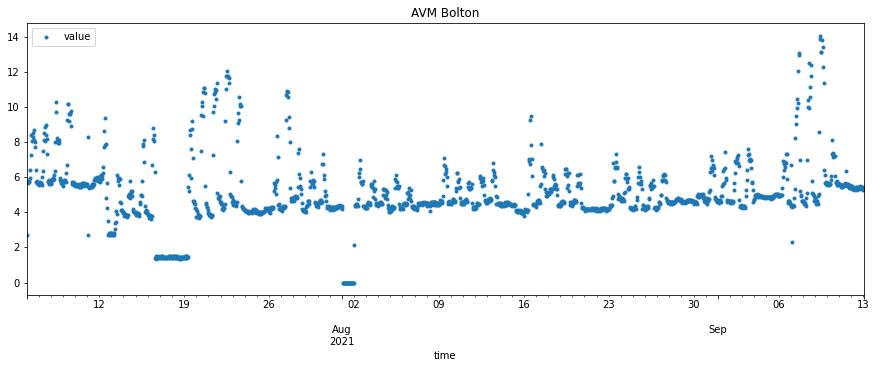

In [21]:
df.plot(style='.', figsize=(15, 5), title="AVM Bolton")

<AxesSubplot:title={'center':'AVM Bolton'}, xlabel='time'>

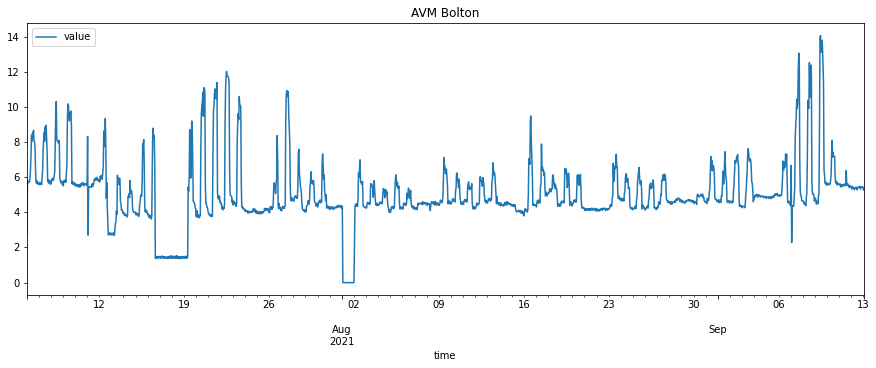

In [22]:
df.plot(style='-', figsize=(15, 5), title="AVM Bolton")

In [23]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

In [24]:
# UK Holiday calendar //https://www.tobiolabode.com/blog/2019/1/1/pandas-for-uk-hoildays?rq=pandas

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, \
    DateOffset, MO, next_monday, next_monday_or_tuesday, GoodFriday, EasterMonday


class Hoildays_England_and_Wales(AbstractHolidayCalendar):
    rules = [
        Holiday('New Years Day', month=1, day=1, observance=next_monday),
        GoodFriday,
        Holiday('Early May Bank Holiday', month=5, day=1, offset=DateOffset(weekday=MO(1))),
        Holiday('Spring Bank Holiday', month=5, day=31, offset=DateOffset(weekday=MO(-1))),
        Holiday('Summer Bank Holiday', month=8, day=31, offset=DateOffset(weekday=MO(-1))),
        Holiday('Christmas Day', month=12, day=25, observance=next_monday),
        Holiday('Boxing Day', month=12, day=26, observance=next_monday_or_tuesday)
    ]

In [25]:
# season // http://projectbritain.com/weather/seasons.htm

def calculate_season(month):
    """
    march to may - spring
    june to auguest - summer
    september to november - autumn
    december to februar  - winter
    """
    if month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "autumn"
    else:
        return "winter"

In [26]:
# weekends 

def calculate_weekends(weekday):
    """
    if weekday is 5,6 (satuday, sunday
    """
    if weekday in [5, 6]:
        return "weekend"
    else:
        return "workday"

In [27]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek.map(weekdays)
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.isocalendar().week
df['season']= df['date'].dt.month.apply(calculate_season)
df['work'] = df['date'].dt.dayofweek.apply(calculate_weekends)

In [28]:
df.head()

,value,date,hour,dayofweek,month,year,dayofmonth,weekofyear,season,work
time,,,,,,,,,,
2021-07-06 01:00:00,2.728,2021-07-06 01:00:00,1,Tuesday,7,2021,6,27,summer,workday
2021-07-06 02:00:00,5.718,2021-07-06 02:00:00,2,Tuesday,7,2021,6,27,summer,workday
2021-07-06 03:00:00,5.782,2021-07-06 03:00:00,3,Tuesday,7,2021,6,27,summer,workday
2021-07-06 04:00:00,5.688,2021-07-06 04:00:00,4,Tuesday,7,2021,6,27,summer,workday
2021-07-06 05:00:00,5.762,2021-07-06 05:00:00,5,Tuesday,7,2021,6,27,summer,workday


In [29]:
df.tail()

,value,date,hour,dayofweek,month,year,dayofmonth,weekofyear,season,work
time,,,,,,,,,,
2021-09-12 21:00:00,5.426,2021-09-12 21:00:00,21,Sunday,9,2021,12,36,autumn,weekend
2021-09-12 22:00:00,5.464,2021-09-12 22:00:00,22,Sunday,9,2021,12,36,autumn,weekend
2021-09-12 23:00:00,5.406,2021-09-12 23:00:00,23,Sunday,9,2021,12,36,autumn,weekend
2021-09-13 00:00:00,5.266,2021-09-13 00:00:00,0,Monday,9,2021,13,37,autumn,workday
2021-09-13 01:00:00,5.366,2021-09-13 01:00:00,1,Monday,9,2021,13,37,autumn,workday


In [30]:
df.isna().sum(axis=0)

value         0
date          0
hour          0
dayofweek     0
month         0
year          0
dayofmonth    0
weekofyear    0
season        0
work          0
dtype: int64

In [31]:
sns.set(rc={'figure.figsize':(12,10)})

<AxesSubplot:xlabel='hour', ylabel='value'>

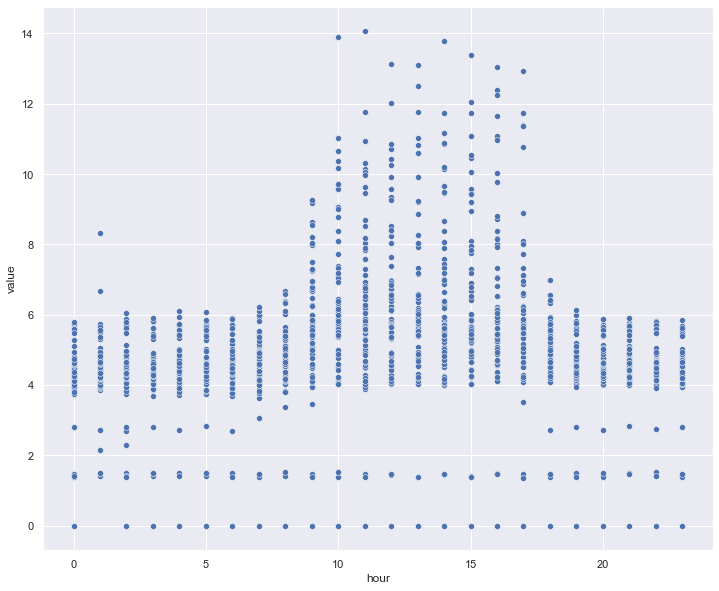

In [32]:
sns.scatterplot(x="hour", y="value", data=df)

<AxesSubplot:xlabel='dayofweek', ylabel='value'>

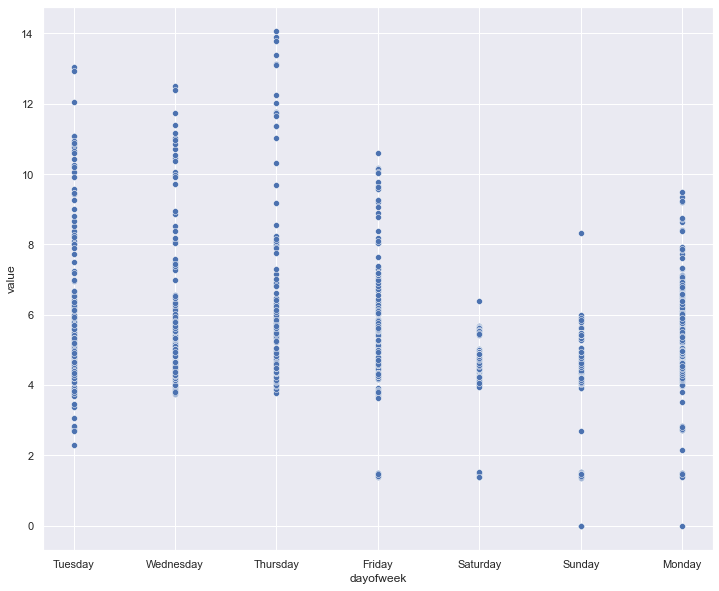

In [33]:
sns.scatterplot(x='dayofweek',y='value', data=df)

<AxesSubplot:xlabel='work', ylabel='value'>

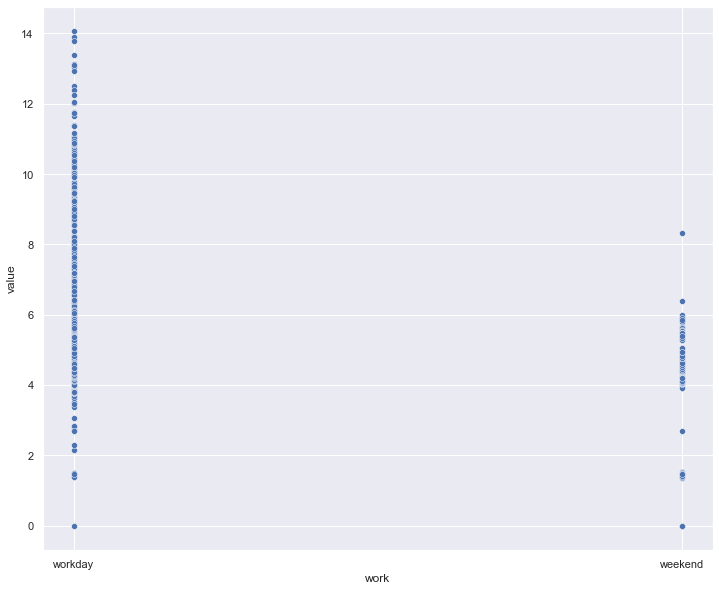

In [34]:
sns.scatterplot(x='work',y='value', data=df)

<AxesSubplot:xlabel='dayofweek', ylabel='value'>

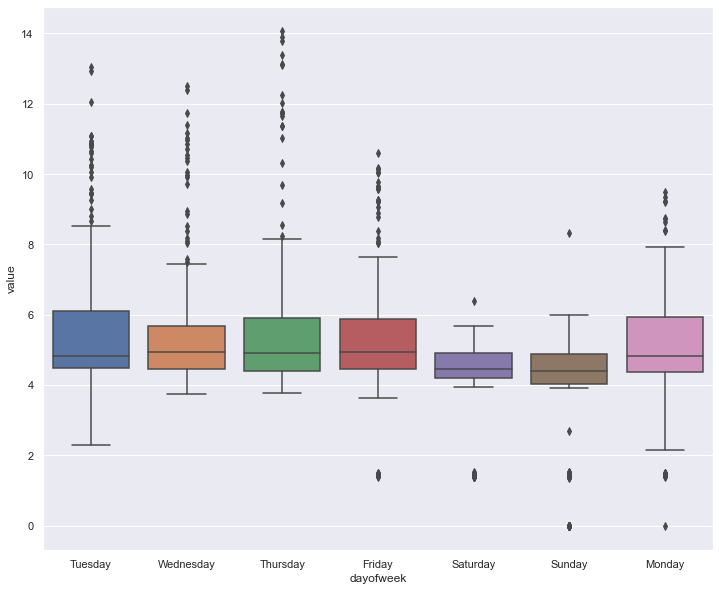

In [35]:
sns.boxplot(x='dayofweek',y='value', data=df)

<AxesSubplot:xlabel='work', ylabel='value'>

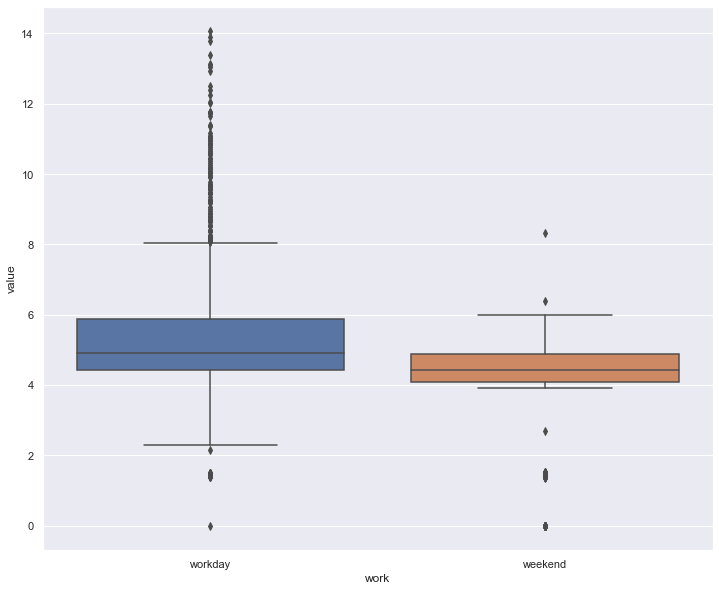

In [36]:
sns.boxplot(x='work',y='value', data=df)

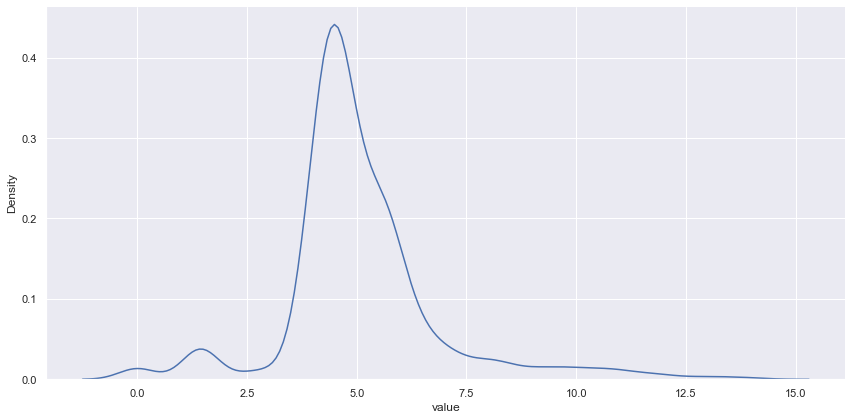

In [37]:
sns.displot(x='value', data=df, kind="kde", height=6, aspect=2)

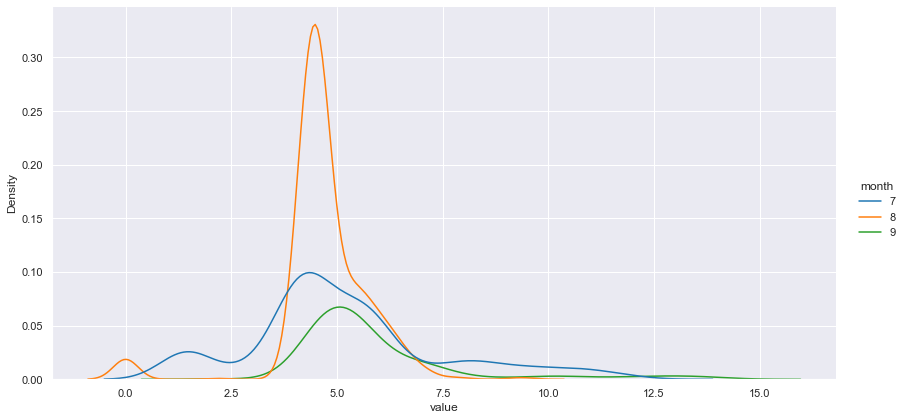

In [38]:
sns.displot(data=df, x="value", hue="month", kind="kde", palette="tab10", height=6, aspect=2)

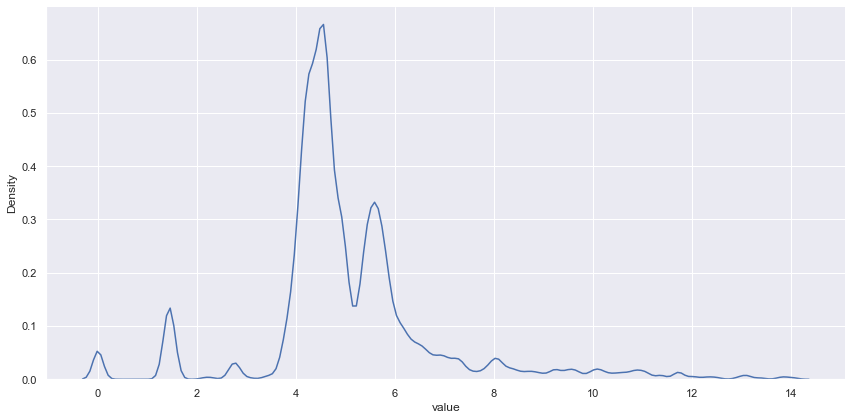

In [39]:
sns.displot(x='value', data=df, kind="kde",bw_adjust=.25, height=6, aspect=2)

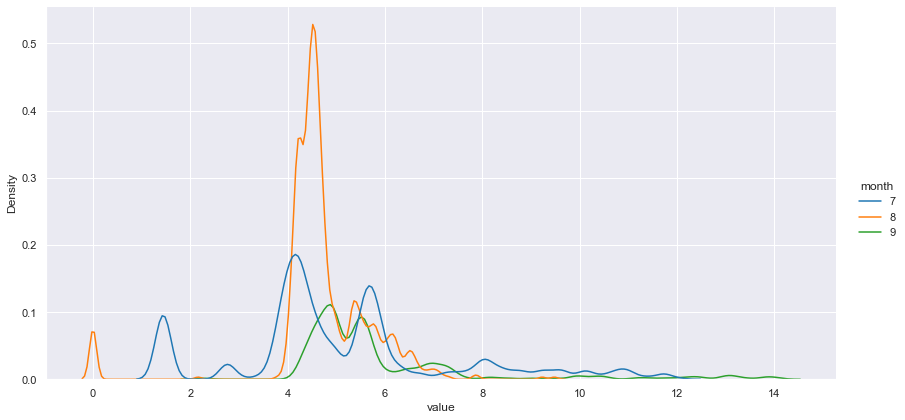

In [40]:
sns.displot(data=df, x="value", hue="month", kind="kde", bw_adjust=.25, palette="tab10", height=6, aspect=2)

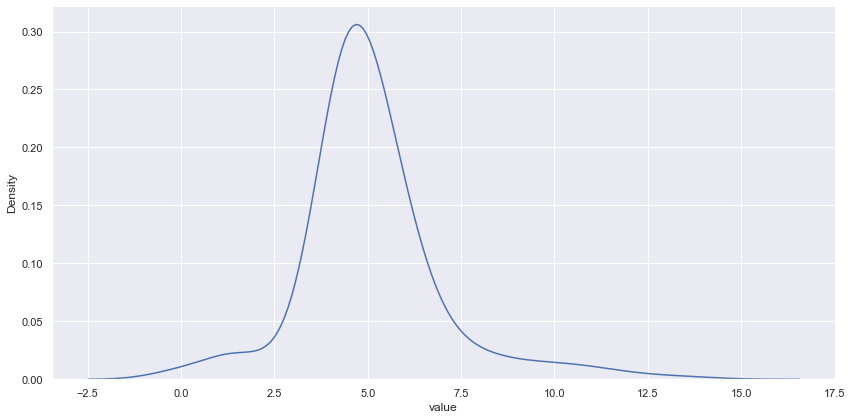

In [41]:
sns.displot(x='value', data=df, kind="kde",bw_adjust=2, height=6, aspect=2)

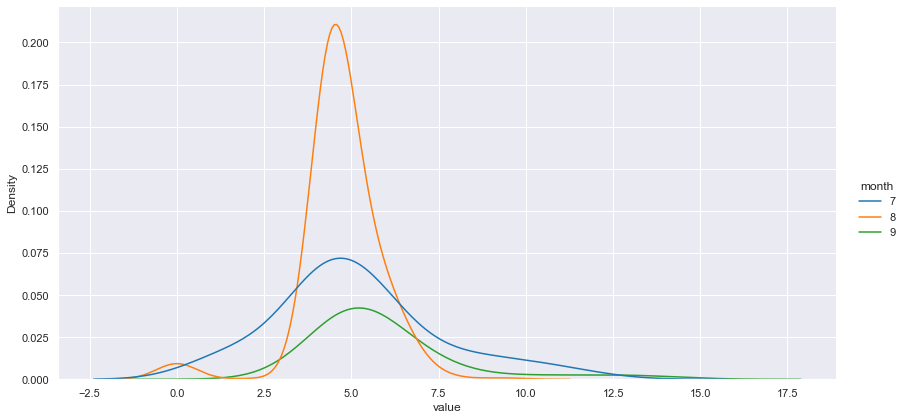

In [42]:
sns.displot(data=df, x="value", hue="month", kind="kde", bw_adjust=2, palette="tab10", height=6, aspect=2)

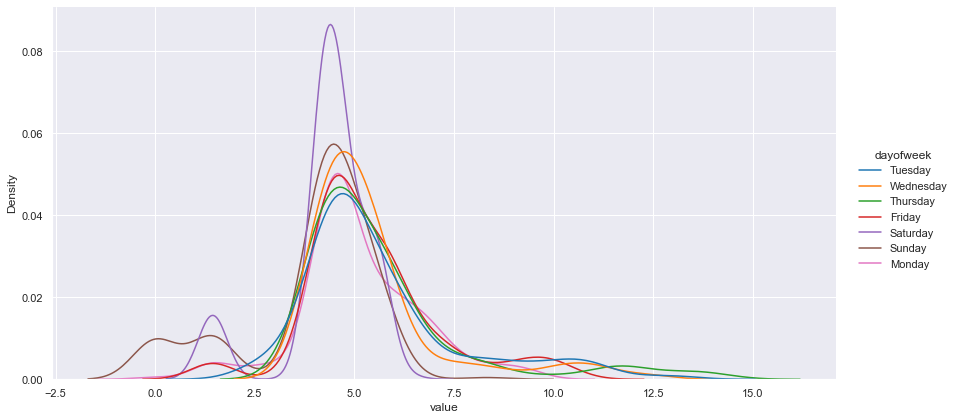

In [43]:
sns.displot(data=df, x="value", hue="dayofweek", kind="kde", palette="tab10", height=6, aspect=2)

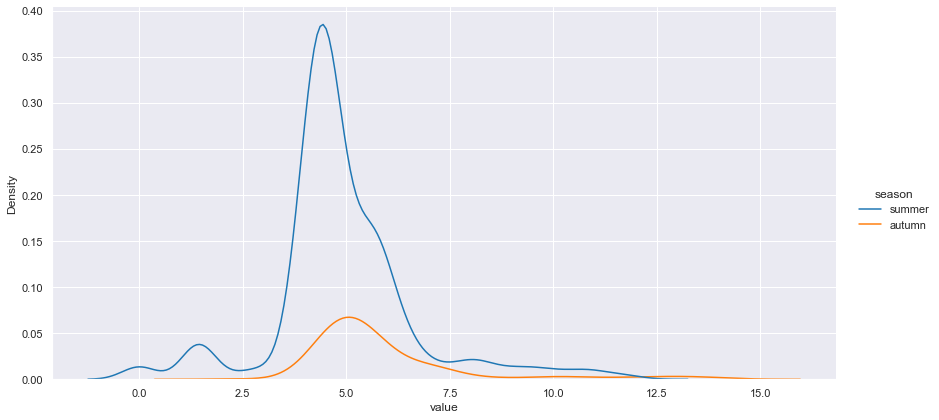

In [44]:
sns.displot(data=df, x="value", hue="season", kind="kde", palette="tab10", height=6, aspect=2)

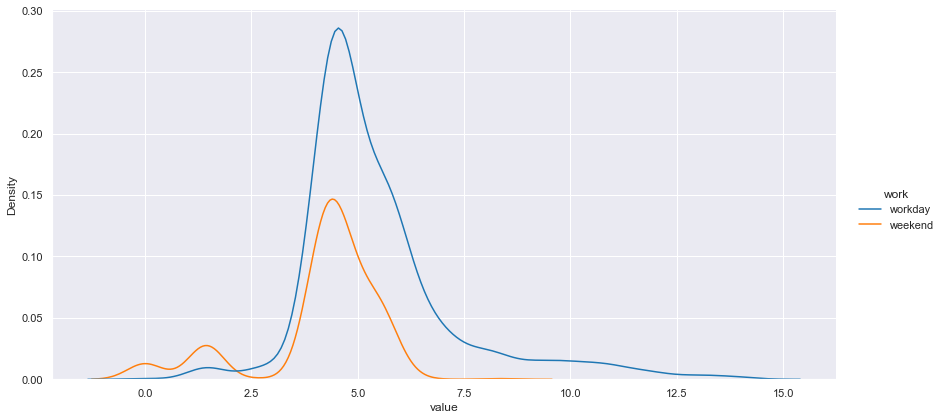

In [45]:
sns.displot(data=df, x="value", hue="work", kind="kde", palette="tab10", height=6, aspect=2)

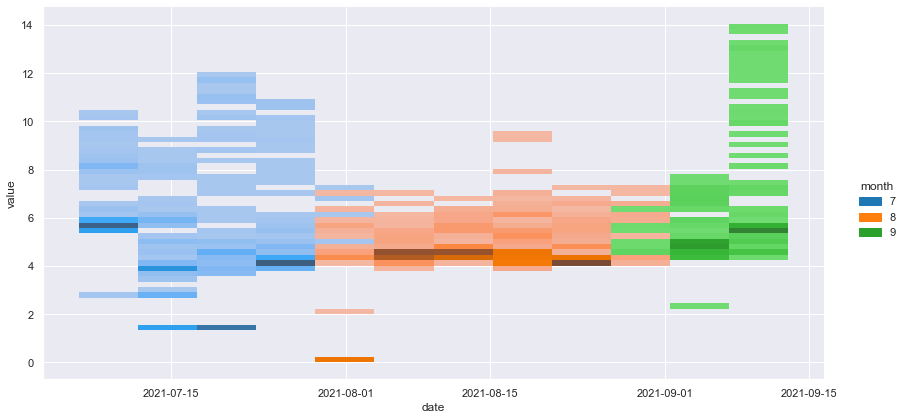

In [46]:
sns.displot(data=df, x="date", y="value", hue="month", palette="tab10", height=6, aspect=2)

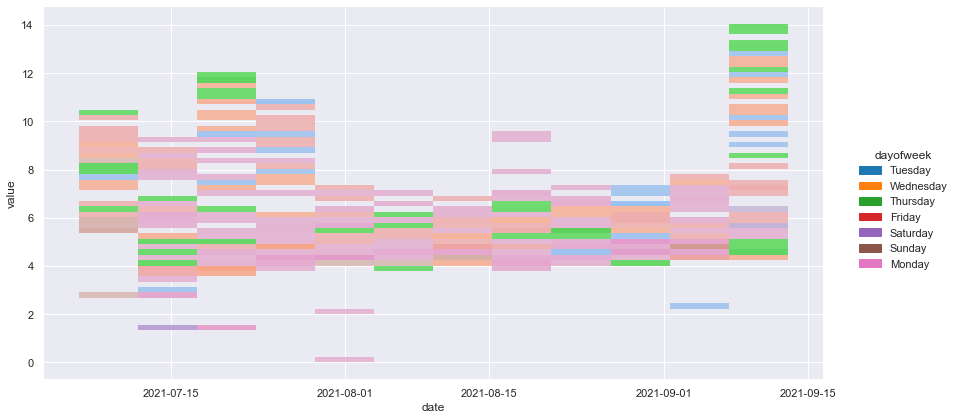

In [47]:
sns.displot(data=df, x="date", y="value", hue="dayofweek", palette="tab10", height=6, aspect=2)

<AxesSubplot:xlabel='month', ylabel='value'>

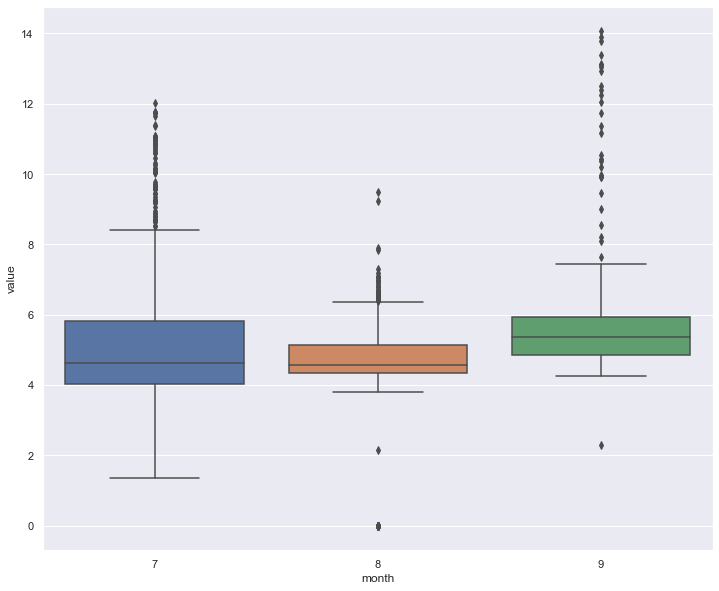

In [48]:
sns.boxplot(x='month',y='value', data=df)

<AxesSubplot:xlabel='weekofyear', ylabel='value'>

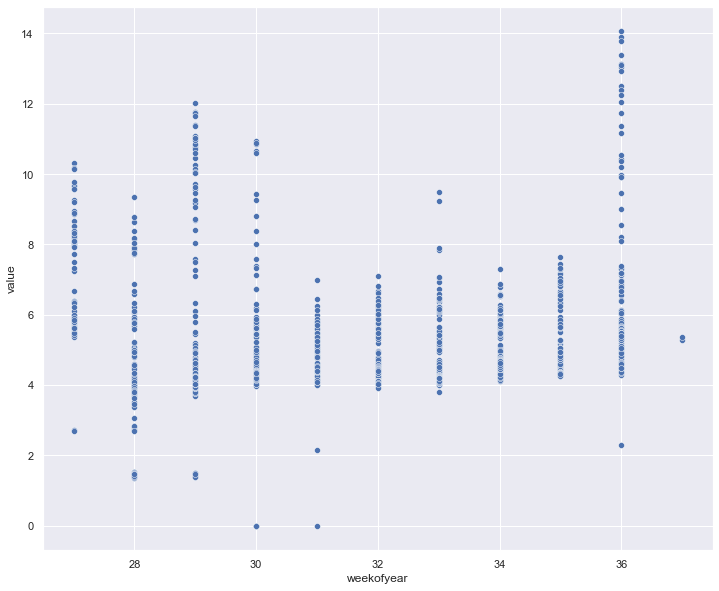

In [49]:
sns.scatterplot(x='weekofyear',y='value', data=df)

things to do

* adding holidays
* adding weather information

In [50]:
df.sample()

,value,date,hour,dayofweek,month,year,dayofmonth,weekofyear,season,work
time,,,,,,,,,,
2021-07-11 15:00:00,5.906,2021-07-11 15:00:00,15,Sunday,7,2021,11,27,summer,weekend


In [51]:
df["weekofyear"].value_counts()

28    168
29    168
30    168
31    168
32    168
33    168
34    168
35    168
36    168
27    143
37      2
Name: weekofyear, dtype: Int64

In [52]:
df_train = df.loc[df.weekofyear < 36]

In [53]:
df_train.shape

(1487, 10)

In [54]:
df_test = df.loc[df.weekofyear >= 36]

In [55]:
df_test.shape

(170, 10)

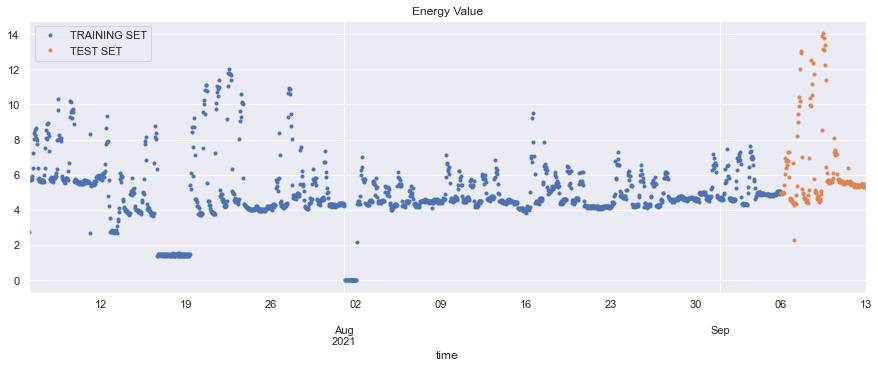

In [56]:
(df_train.rename(columns={'value': 'TRAINING SET'})).append(df_test.rename(columns={'value': 'TEST SET'}), sort = False)[['TRAINING SET','TEST SET']].plot(style='.', figsize = (15,5), title = "Energy Value");

In [57]:
df.sample()

,value,date,hour,dayofweek,month,year,dayofmonth,weekofyear,season,work
time,,,,,,,,,,
2021-09-06 12:00:00,6.842,2021-09-06 12:00:00,12,Monday,9,2021,6,36,autumn,workday


In [58]:
df.drop(columns=["date", "dayofweek", "weekofyear", "season", "work"], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1657 entries, 2021-07-06 01:00:00 to 2021-09-13 01:00:00
Freq: H
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       1657 non-null   float64
 1   hour        1657 non-null   int64  
 2   month       1657 non-null   int64  
 3   year        1657 non-null   int64  
 4   dayofmonth  1657 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 142.2 KB


In [60]:
x_train = df_train[['hour','month','year', 'dayofmonth']]
x_test = df_test[['hour','month','year', 'dayofmonth']]
y_train = df_train[['value']]
y_test = df_test[['value']]

#### XGBOOST Model

In [61]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(x_train, y_train,
       eval_set = [(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

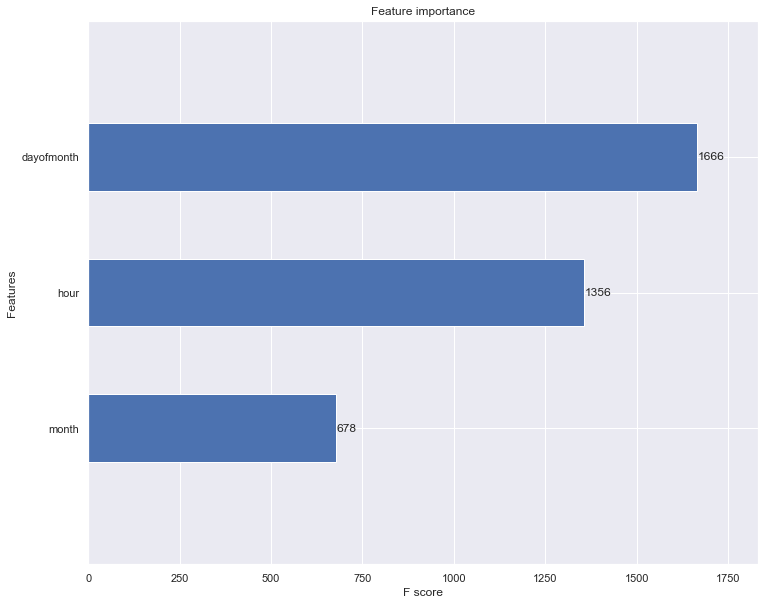

In [63]:
plot_importance(reg, height = 0.5)

In [64]:
df_test['MW_Prediction'] = reg.predict(x_test)
eng_all = pd.concat([df_test, df_train], sort=False)

C:\Users\DINESH~1.AVM\AppData\Local\Temp/ipykernel_3628/1326193031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MW_Prediction'] = reg.predict(x_test)


<AxesSubplot:xlabel='time'>

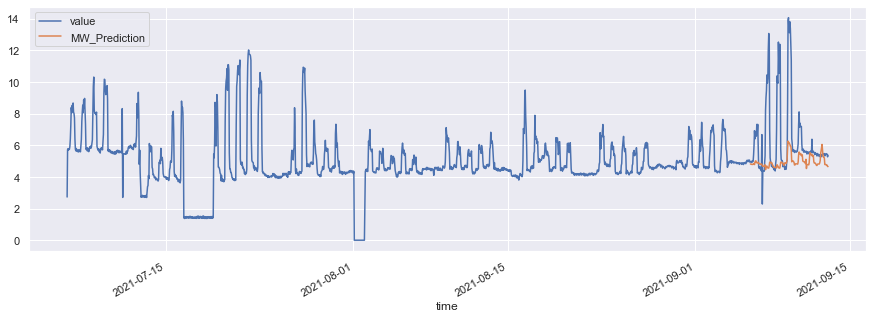

In [65]:
eng_all[['value','MW_Prediction']].plot(figsize=(15, 5))